### Import Libraries

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer


### Load Dataset 

In [67]:
# Example dataset - replace with your actual dataset
data = pd.read_csv('Titanic-Dataset.csv')
# Step 2: Drop unnecessary columns and handle missing values
data = data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])  # drop unneeded text columns
data = data.dropna()  # for simplicity (or use imputation)

# Step 3: Encode categorical variables (like 'Sex' and 'Embarked')
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Step 4: Separate features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train Multiple Models

In [69]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print("Initial Model Evaluation:\n")
print(results_df)


Initial Model Evaluation:

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.797203   0.854167  0.650794  0.738739
Random Forest        0.790210   0.789474  0.714286  0.750000
SVM                  0.818182   0.862745  0.698413  0.771930


### HyperParameter Tunning

### GridSearchCV

In [71]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_search_rf.best_params_)


C:\Users\mehul\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


### RandomizedSearchCV

In [72]:
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

random_search_svm = RandomizedSearchCV(SVC(), param_distributions=param_dist_svm, n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1)
random_search_svm.fit(X_train, y_train)

print("Best SVM Params:", random_search_svm.best_params_)


Best SVM Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}


### Retrain Tuned Models and Re-Evaluate

In [75]:
best_rf = grid_search_rf.best_estimator_
best_svm = random_search_svm.best_estimator_

tuned_models = {
    'Tuned Random Forest': best_rf,
    'Tuned SVM': best_svm
}

for name, model in tuned_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Final comparison
final_results_df = pd.DataFrame(results).T
print("\nFinal Comparison After Hyperparameter Tuning:\n")
print(final_results_df)



Final Comparison After Hyperparameter Tuning:

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.797203   0.854167  0.650794  0.738739
Random Forest        0.790210   0.789474  0.714286  0.750000
SVM                  0.818182   0.862745  0.698413  0.771930
Tuned Random Forest  0.783217   0.796296  0.682540  0.735043
Tuned SVM            0.797203   0.826923  0.682540  0.747826


### Plotting Results 

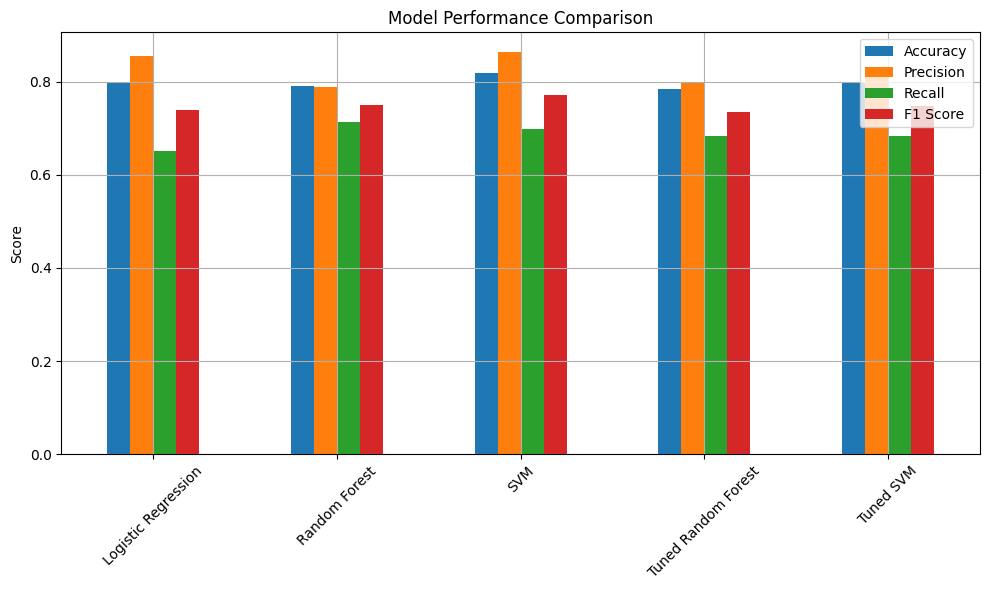

In [77]:

import matplotlib.pyplot as plt

final_results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusion -  Conclusion: Best Model - Untuned SVM

Among all models, untuned SVM delivered the best performance, achieving the highest F1-score of 0.7719 and highest accuracy of 0.8182.